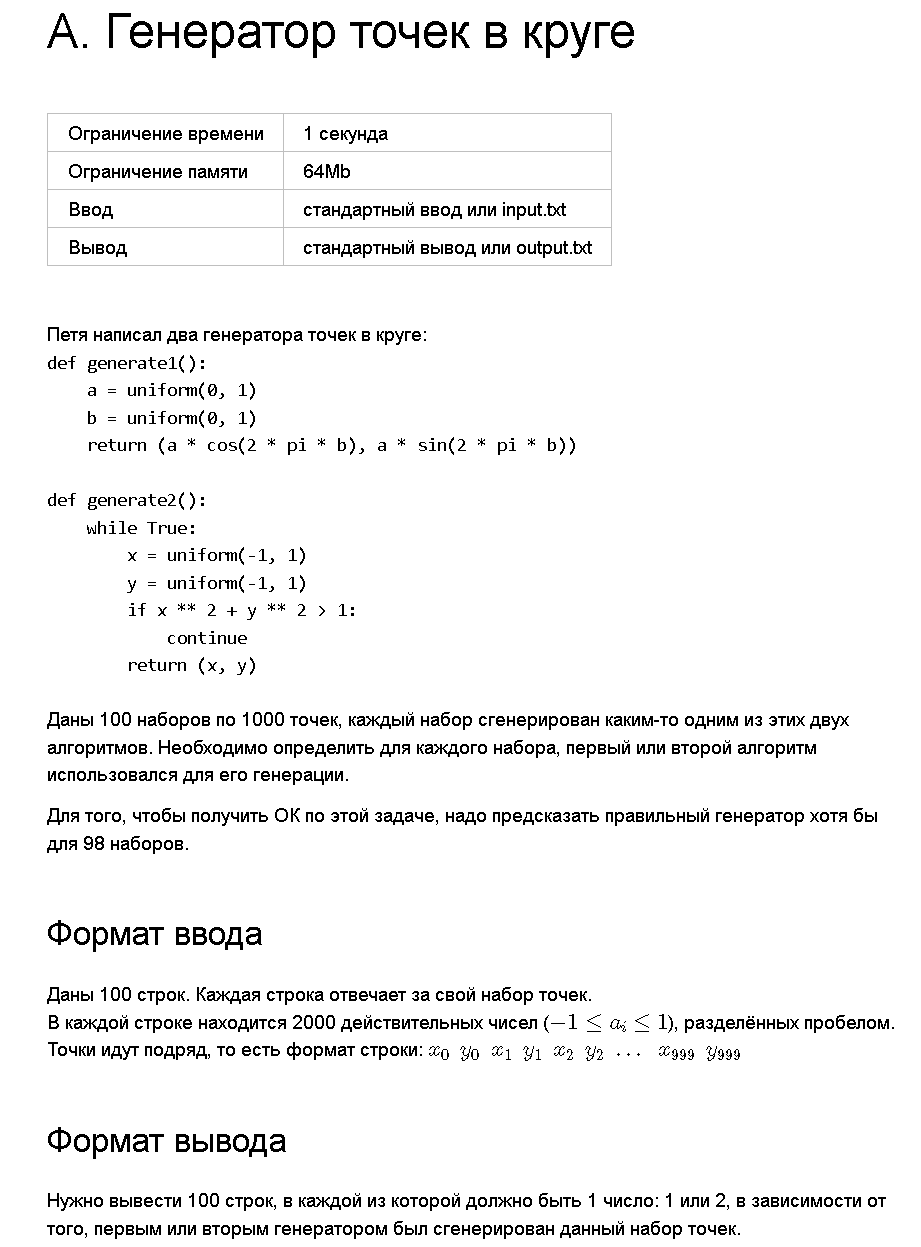

In [1]:
# Анализ генераторов

import numpy as np
from random import uniform
from random import randint
from math import sin, cos, pi 
import matplotlib.pyplot as plt


# Метод генерации точек по полярной системе координат
# В данном случае точки плотнее располагаются в центре круга.
# Проблема не в генерации угла поворота, т.к. точки равномерно распределенны по кругу.
# Проблема в выборе радиуса, т.к. распределение равномерое, то вероятность выбора радиуса равномерна.
# Из этого следует, что каждое кольцо в круге будет содержать одинаковое кол-во точек.
# С увеличением длины кольца точек столько же  колько и на более коротких кольцах.
# А центра окружности самые короткие кольца, следовательно там самая большая плотность точек.
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b),
            a * sin(2 * pi * b))

# Метод генерации точек по декартовой системе координат
def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)

        # Выборка с отклонением (rejection sampling).
        # Вместо того чтобы преобразовать некое распределение.
        # Мы отклоняем все результаты вне нужного интервала.
        if x ** 2 + y ** 2 > 1:  
            continue

        return (x, y)

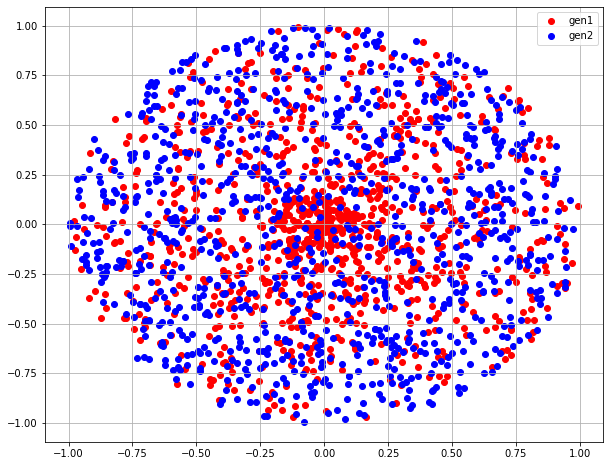

In [2]:
# Визулизация генераторов
x_gen1, y_gen1 = [], []
for i in range(1_000):
    x, y = generate1()
    x_gen1.append(x)
    y_gen1.append(y)

x_gen2, y_gen2 = [], []
for i in range(1_000):
    x, y = generate2()
    x_gen2.append(x)
    y_gen2.append(y)

plt.figure(figsize=(10, 8))
plt.scatter(x_gen1, y_gen1, color='r', label='gen1')
plt.scatter(x_gen2, y_gen2, color='b', label='gen2')
plt.legend(loc='best')
plt.grid()
plt.show()

In [3]:
# Генерация данных для теста и колибровки решающего правила

# Функция генерации n точек в  формате "x0 y0 x1 y1 ... xn yn"
# Дополнительно возращает генератор через который набор был задан
def get_string(points_qty=1_000):
    string = ''
    gen = randint(0, 1)
    for i in range(points_qty):
        x, y =[generate1(), generate2()][gen]
        string += '{} {} '.format(x, y)
    return string[:-1], gen + 1

# Функция для создания m строк по n точек
def get_data(rows=100, points=1_000):
    strings, gens = [], []
    for _ in range(rows):
        string, gen = get_string(points)
        strings.append(string)
        gens.append(gen)
    return strings, gens

strings, gens = get_data()

In [4]:
# Функция для определения генератора
def generator_definition(string: str, radius=0.25, threshold=100) -> int:
    '''
    :param string - строка точек генератора типа "x0 y0 x1 y1 ... xn yn"
    :param radius - радиус рядом с центром, желательно выбирать значения от 0 до 0.25
    :param threshold - пороговое значение кол-ва точек в заданном ранее радиусе.
                       Если данное значение превышено, то признаем полярный генератор.
    :return - 1 если полярный генератор или 2 если декартовый. 
    '''
    points = tuple(map(float, string.split()))

    xs = [1 if abs(x) < radius else 0 for x in  points[::2]]
    ys = [1 if abs(y) < radius else 0 for y in  points[1::2]]

    points_counter = 0
    for x, y in zip(xs, ys):
        if x == 1 and y == 1:
            points_counter += 1

    return 1 if points_counter > threshold else 2

In [5]:
# Проверка решения

# Предскажем классы генераторам
predicts = []
for string in strings:
    predicts.append(generator_definition(string))


# предсказанные генераторы
print(predicts)
# [2, 1, 2, 2, 2, 1 ... 1, 2]

# истинные генераторы
print(gens)
# [2, 1, 2, 2, 2, 1 ... 1, 2]

# Посчитаем ошибку по MSE
mse = np.sum((np.array(predicts) - np.array(gens))**2)
print(mse)
# 0 -> Ошибок нет вовсе

[2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1]
[2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1]
1
